In [101]:
import pandas as pd
import numpy as np
from pandas import datetime
import seaborn as sns
from matplotlib import pyplot
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error


<ipython-input-101-d1d2c663f5f0>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [102]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [103]:
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


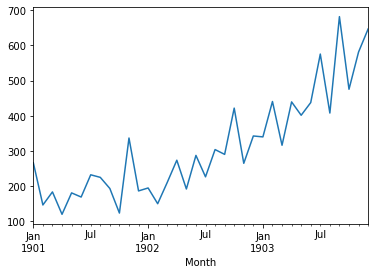

In [104]:
print(series.head())
series.plot()
pyplot.show()

In [105]:
series.index = series.index.to_period('M')
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [106]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=349.117666, expected=342.300000
predicted=306.512973, expected=339.700000
predicted=387.376403, expected=440.400000
predicted=348.154149, expected=315.900000
predicted=386.308845, expected=439.300000
predicted=356.082048, expected=401.300000
predicted=446.379474, expected=437.400000
predicted=394.737257, expected=575.500000
predicted=434.915377, expected=407.600000
predicted=507.923456, expected=682.000000
predicted=435.482949, expected=475.300000
predicted=652.743796, expected=581.300000
predicted=546.343528, expected=646.900000


Test RMSE: 83.417


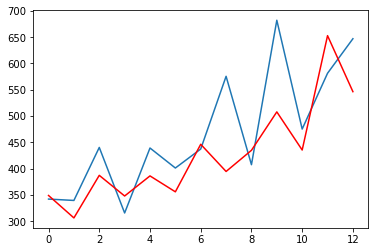

In [107]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()